In [9]:
import pandas as pd

In [2]:
df = pd.read_csv('finances.csv')

In [3]:
df.head()

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow
0,2024,Microsoft,"245,122","88,136","159,734","243,686","118,548"
1,2024,Apple,"391,040","93,736","364,980","308,030","109,000"
2,2024,Tesla,"96,773","14,974","106,618","43,009","3,580"
3,2023,Microsoft,"211,915","72,361","184,257","205,753","87,582"
4,2023,Apple,"383,029","96,995","352,583","290,437","99,584"


In [4]:
df.head()

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow
0,2024,Microsoft,"245,122","88,136","159,734","243,686","118,548"
1,2024,Apple,"391,040","93,736","364,980","308,030","109,000"
2,2024,Tesla,"96,773","14,974","106,618","43,009","3,580"
3,2023,Microsoft,"211,915","72,361","184,257","205,753","87,582"
4,2023,Apple,"383,029","96,995","352,583","290,437","99,584"


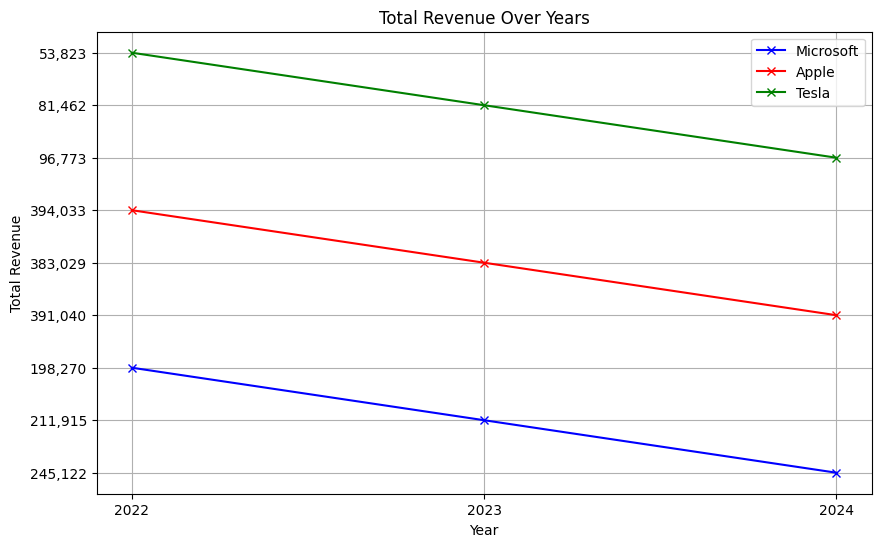

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# df_microsoft = df[df['Company'] == 'Microsoft']
# df_apple = df[df['Company'] == 'Apple']
# df_tesla = df[df['Company'] == 'Tesla']
# df_microsoft.head()
# x = df_microsoft['Year'].values
# y = df_microsoft['Total Revenue'].values
# x1 = df_apple['Year'].values
# y1 = df_apple['Total Revenue'].values
# x2 = df_tesla['Year'].values
# y2 = df_tesla['Total Revenue'].values
# plt.figure(figsize=(10, 6))
# plt.title('Total Revenue Over Years')
# plt.xlabel('Year')
# plt.ylabel('Total Revenue')
# plt.plot(x,y,label = 'Microsoft')
# plt.plot(x1,y1,label='Apple')
# plt.plot(x2,y2,label='Tesla')

# plt.legend(loc="best")
# plt.show()

companies = ['Microsoft', 'Apple', 'Tesla']

# defining a colormap for consistency
color_map = {
    'Microsoft': 'blue',
    'Apple': 'red',
    'Tesla': 'green'}

# errors = 'coerce' is often used in functions that convert data types, particularly within the pandas library
plt.figure(figsize=(10, 6))
plt.title('Total Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
# we have to define this because matplotlib interprets the years as numerical ints
plt.xticks([2022, 2023, 2024])
# plots data in the order it appears in the dataframe
# Loop through each company and plot its data
for company in companies:
    df_company = df[df['Company'] == company]  # Filter data for the company
    plt.plot(df_company['Year'].values, df_company['Total Revenue'].values, label=company, color = color_map[company],marker='x')
plt.grid("True")
plt.legend(loc="best")
plt.show()







Tesla Revenue: Up Up Up
Apple Revenue: Up Down up
Microsoft: Up Up UP

Apple had a loss of total revenue in 2023 due to a slump in iphone sales; factors include competition from 
Chinese markets, and customers reluctant to upgrade due to lack of technological advancements

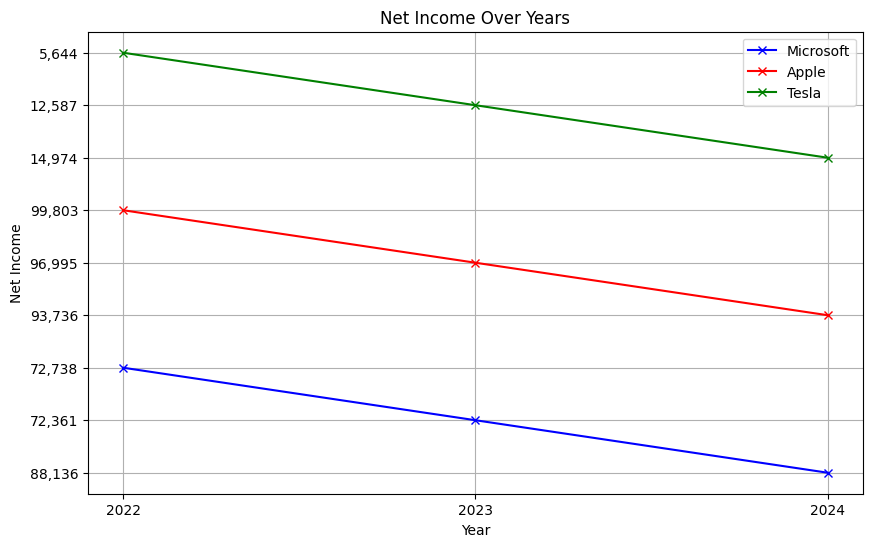

In [6]:
companies = ['Microsoft', 'Apple', 'Tesla']

plt.figure(figsize=(10, 6))
plt.title('Net Income Over Years')
plt.xlabel('Year')
plt.ylabel('Net Income')
plt.xticks([2022, 2023, 2024])
# Loop through each company and plot its data
for company in companies:
    df_company = df[df['Company'] == company]  # Filter data for the company
    plt.plot(df_company['Year'].values, df_company['Net Income'].values, label=company, color = color_map[company], marker='x')
plt.grid("True")
plt.legend(loc="best")
plt.show()



Tesla: Up Up UP 
Apple: Up Down Down 
Microsoft: Up The Same Up

Why did Apple have a loss of net income in 2024 even though their Total Revenue increased?
Someitmes high cost can cause a drop in company profits. 
In Apple's case they slumped in net income after the company paid a one time charge as a part of a tax decision in Europe,
about $10.2 billion (settling a Apple tax case in Ireland)

In [7]:

comp_dict = {'Microsoft': 0, 'Apple': 1, 'Tesla': 2}

df['Comp Num'] = df['Company'].map(comp_dict)

# ensure all calculations are numeric (getting rid of commas)
df['Total Revenue'] = df['Total Revenue'].str.replace(',', '').astype(float)
df['Net Income'] = df['Net Income'].str.replace(',', '').astype(float)

# sort year values for pct_change calculations
df = df.sort_values(by=['Comp Num', 'Year'])

# Calculate year-over-year growth rates for Total Revenue and Net Income
df['Revenue Growth (%)'] = df.groupby('Comp Num')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Comp Num')['Net Income'].pct_change() * 100

# Fill NA values that result from pct_change calculations with 0 or an appropriate value
# since we have no growth to compare to for the first year
df.fillna(0, inplace=True)

# Display the dataframe to verify the calculations
print(df)

# Optionally, you could summarize these findings for each company
summary = df.groupby('Comp Num').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean'
}).reset_index()

print("\nYear-over-Year Average Growth Rates (%):")
print(summary)

   Year    Company  Total Revenue  Net Income Total Assets Total Liabilities   \
6  2022  Microsoft       198270.0     72738.0      364,840             95,082   
3  2023  Microsoft       211915.0     72361.0      184,257            205,753   
0  2024  Microsoft       245122.0     88136.0      159,734            243,686   
7  2022      Apple       394033.0     99803.0      352,755            290,437   
4  2023      Apple       383029.0     96995.0      352,583            290,437   
1  2024      Apple       391040.0     93736.0      364,980            308,030   
8  2022      Tesla        53823.0      5644.0       82,338             36,440   
5  2023      Tesla        81462.0     12587.0       82,338             36,440   
2  2024      Tesla        96773.0     14974.0      106,618             43,009   

  Cash Flow  Comp Num  Revenue Growth (%)  Net Income Growth (%)  
6    89,035         0            0.000000               0.000000  
3    87,582         0            6.882030              